<center><h1>Store Sales - Time Series Forecasting</h1></center>

<p>Welcome to my data science project, which is focused on store sales time series forecasting. The project was initiated by Kaggle, a popular platform for data science competitions and challenges. The objective of this project was to develop a model that can accurately predict the future sales of a store using historical sales data.</p>
<p>In this project, I have utilized my skills in data visualization, data analytics, data cleansing, and machine learning to analyze the dataset and develop a predictive model. The dataset was obtained from the Kaggle competition website (https://www.kaggle.com/competitions/store-sales-time-series-forecasting), which contained information on the sales of a store for a period of two years.</p>

<h3>Data Exploratory</h3>
<p>First of all, I imported some essential Python libraries for the further task, data analysis. Then, I opened the first dataset from a CSV file named "stores" and stored the data in the form of Pandas' DataFrame named "df_store". This pattern of the dataset loading process also applies with other datasets to be analyzed, as you will see in the next cells.</p>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

file_path = 'datasets'
df_store = pd.read_csv(os.path.join(file_path, 'stores.csv'))

df_store.head(5)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


<p>In "df_store", there are 5 columns.
<ol>
    <li><b>"store_nbr"</b> represents the ID number of each store branch.</li>
    <li><b>"city"</b> represents the city in which each branch is located.</li>
    <li><b>"state"</b> represents the state in which each branch is located.</li>
    <li><b>"type"</b> represents the type of each branch, which could align from the letter A to E.</li>
    <li><b>"cluster"</b> represents the number of similar stores near each branch.</li>
</ol>
So let's explore more details of "df_store".
</p>

In [3]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


<p>There are 54 branches of the store without any null values. "store_nbr" and "cluster" store integer data, whereas the others contain object data.</p>
<p>Since I had noticed that the "city" column and the "state" column displayed repetitive information, which was unnecessary, it could be better to drop one column from both of them, and I decided to drop "state" since it's the bigger unit compared to "city", so it could maintain the detail of the dataset. But before I drop "state", I saved the information about each state in a dictionary named "ecu_map", of which the key is the state, and the value is the list of cities belonging to each state.</p>

In [2]:
ecu_map = {state: [] for state in df_store['state'].unique()}

for i in df_store.index:
  city = df_store.loc[i]['city']
  state = ecu_map[df_store.loc[i]['state']]
  if not city in state:
    state.append(city)

print(ecu_map)

{'Pichincha': ['Quito', 'Cayambe'], 'Santo Domingo de los Tsachilas': ['Santo Domingo'], 'Cotopaxi': ['Latacunga'], 'Chimborazo': ['Riobamba'], 'Imbabura': ['Ibarra'], 'Bolivar': ['Guaranda'], 'Pastaza': ['Puyo'], 'Tungurahua': ['Ambato'], 'Guayas': ['Guayaquil', 'Daule', 'Playas', 'Libertad'], 'Santa Elena': ['Salinas'], 'Los Rios': ['Babahoyo', 'Quevedo'], 'Azuay': ['Cuenca'], 'Loja': ['Loja'], 'El Oro': ['Machala'], 'Esmeraldas': ['Esmeraldas'], 'Manabi': ['Manta', 'El Carmen']}


<p>After the state information had already been saved securely and completely, I could drop "state" out of the dataset.</p>

In [5]:
df_store.drop('state', axis=1, inplace=True)

df_store.head(5)

,store_nbr,city,type,cluster
0,1,Quito,D,13
1,2,Quito,D,13
2,3,Quito,D,8
3,4,Quito,D,9
4,5,Santo Domingo,D,4


<p>Now we had 2 columns that contain categorical data, which are "city" and "type". Therefore, it could be interesting if we can find the number of branches located in each city.</p>

C:\Users\User\AppData\Local\Temp\ipykernel_8580\816889450.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


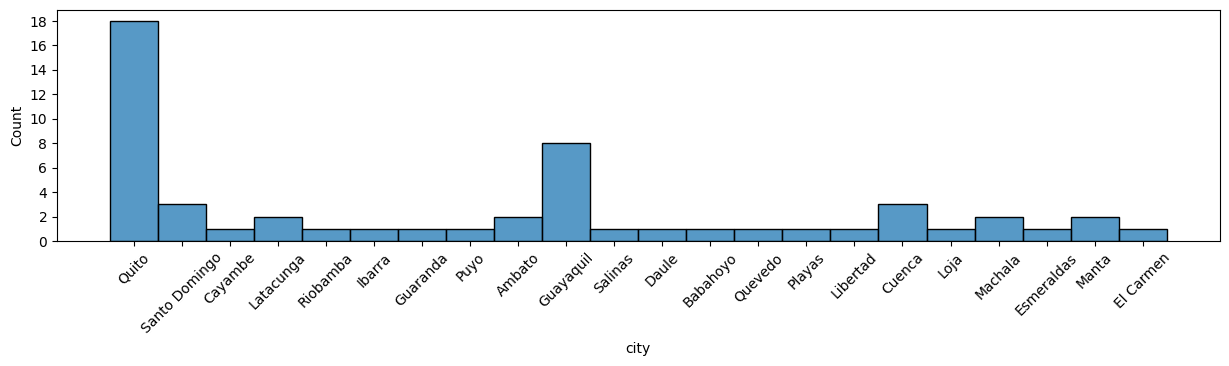

In [23]:
plt.figure(figsize=(15, 3))
ax = sns.histplot(data=df_store, x='city')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticks(np.arange(0, 20, 2))
plt.show()

<p>According to the histogram plot, Quito is the city with the highest number of branches are located in by 18 branches. The second highest one is Guayaquil, in which 9 branches are located. And the third ones are Santo Domingo and Cuenca, each of which 3 branches are located in.</p>
(To be continued)

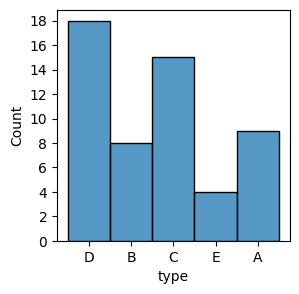

In [29]:
plt.figure(figsize=(3, 3))
ax = sns.histplot(data=df_store, x='type')
ax.set_yticks(np.arange(0, 20, 2))
plt.show()

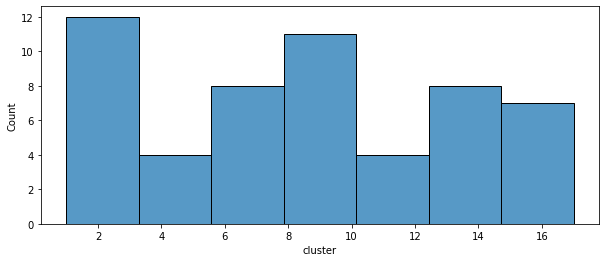

In [7]:
axis = plt.figure(figsize=(10,4))
sns.histplot(data=df_store.sort_values('cluster'), x='cluster')

In [8]:
df_oil = pd.read_csv(os.path.join(file_path, 'oil.csv'))

df_oil.head(5)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [9]:
def split_date(df, drop_date=True):
  df['day'] = df['date'].apply(lambda date: int(date.split('-')[2]))
  df['month'] = df['date'].apply(lambda date: int(date.split('-')[1]))
  df['year'] = df['date'].apply(lambda date: int(date.split('-')[0]))
  if drop_date:
    df.drop('date', axis=1, inplace=True)
    df = df[['day', 'month', 'year'] + list(df.columns[:-3])]
  return df

In [10]:
df_oil = split_date(df_oil, drop_date=False)

df_oil.head(5)

,date,dcoilwtico,day,month,year
0,2013-01-01,NaN,1,1,2013
1,2013-01-02,93.14,2,1,2013
2,2013-01-03,92.97,3,1,2013
3,2013-01-04,93.12,4,1,2013
4,2013-01-07,93.20,7,1,2013


In [11]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
 2   day         1218 non-null   int64  
 3   month       1218 non-null   int64  
 4   year        1218 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 47.7+ KB


In [12]:
df_oil.loc[len(df_oil.index) - 1]

date          2017-08-31
dcoilwtico         47.26
day                   31
month                  8
year                2017
Name: 1217, dtype: object

In [13]:
df_oil_years = df_oil['year'].unique()

df_oil_years

array([2013, 2014, 2015, 2016, 2017])

In [14]:
def is_leap_year(year):
  if year % 4:
    return False
  else:
    if year % 100:
      return True
    else:
      if year % 400:
        return False
      else:
        return True

In [15]:
list(map(is_leap_year, list(map(int, list(df_oil_years)))))

[False, False, False, True, False]

In [16]:
df_oil[(df_oil['day'] == 29) & (df_oil['month'] == 2) & (df_oil['year'] == 2016)]

,date,dcoilwtico,day,month,year
824,2016-02-29,32.74,29,2,2016


In [17]:
days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

days_in_month

[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

In [18]:
for year in df_oil_years:

  if year == 2017:
    final_month = 8
  else:
    final_month = 12

  for month in range(1, final_month + 1):
    for day in range(1, days_in_month[month - 1] + 1):
      if not len(df_oil[(df_oil['day'] == day) & (df_oil['month'] == month) & (df_oil['year'] == year)].index):

        day_string = str(day)
        month_string = str(month)
        year_string = str(year)

        if day < 10:
          day_string = '0' + day_string
        if month < 10:
          month_string = '0' + month_string

        df_oil = df_oil.append(pd.DataFrame([[f'{year_string}-{month_string}-{day_string}', np.nan, day, month, year]], columns=df_oil.columns, index=[0]), ignore_index=True)

df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1704 non-null   object 
 1   dcoilwtico  1175 non-null   float64
 2   day         1704 non-null   int64  
 3   month       1704 non-null   int64  
 4   year        1704 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 66.7+ KB


In [19]:
df_oil = df_oil.sort_values(by=['year', 'month', 'day']).reset_index().drop('index', axis=1)

df_oil.head(5)

,date,dcoilwtico,day,month,year
0,2013-01-01,NaN,1,1,2013
1,2013-01-02,93.14,2,1,2013
2,2013-01-03,92.97,3,1,2013
3,2013-01-04,93.12,4,1,2013
4,2013-01-05,NaN,5,1,2013


In [20]:
for i in df_oil[df_oil['dcoilwtico'].isnull()].index:
  df_oil.at[i, 'dcoilwtico'] = df_oil[(df_oil['month'] == df_oil.loc[i]['month']) & (df_oil['year'] == df_oil.loc[i]['year']) & (df_oil['dcoilwtico'].notnull())]['dcoilwtico'].mean()

df_oil[df_oil['dcoilwtico'].isnull()].index

Int64Index([], dtype='int64')

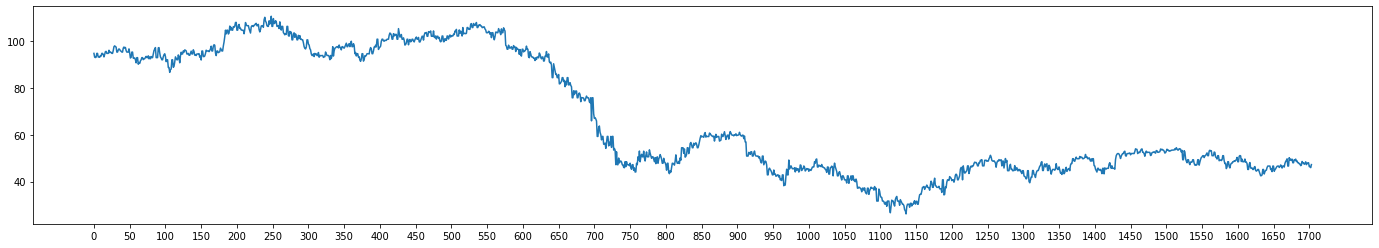

In [21]:
axis = plt.figure(figsize=(24, 4))
plt.plot(df_oil.index, df_oil['dcoilwtico'])
plt.xticks(np.arange(0, 1750, 50))
plt.show()

The oil price drastically falls between index 400 and 600, so I decided to find out the date that this change occurs by approximating that it happened at the index 500.

In [22]:
df_oil.loc[650]

date          2014-10-13
dcoilwtico         85.73
day                   13
month                 10
year                2014
Name: 650, dtype: object

In [23]:
df_holiday = pd.read_csv(os.path.join(file_path, 'holidays_events.csv'))

df_holiday.head(5)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [24]:
df_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [25]:
df_holiday['type'].value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

In [26]:
df_holiday['locale'].value_counts()

National    174
Local       152
Regional     24
Name: locale, dtype: int64

In [27]:
df_holiday['transferred'].value_counts()

False    338
True      12
Name: transferred, dtype: int64

In [28]:
for i in df_holiday.index:
  df_holiday.at[i, 'celebrate'] = (not df_holiday.loc[i]['transferred']) and (df_holiday.loc[i]['type'] != 'Work Day')

df_holiday[df_holiday['celebrate'] == False][['transferred', 'type']].value_counts()

transferred  type    
True         Holiday     12
False        Work Day     5
dtype: int64

In [29]:
df_holiday.head(5)

,date,type,locale,locale_name,description,transferred,celebrate
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,True
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,True
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,True
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,True
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,True


In [30]:
df_transactions = pd.read_csv(os.path.join(file_path, 'transactions.csv'))

df_transactions.head(5)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [31]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


**Don't delete these comment sections! It's going to be explained soon.**

In [ ]:
# df_transactions = split_date(df_transactions)

# df_transactions.head(5)

In [ ]:
# store_nbr = df_transactions['store_nbr'].unique()
# store_nbr.sort()

# list(store_nbr) == list(range(1, 55))

In [ ]:
# start_col = list(df_transactions['date'].value_counts().keys())
# start_col.sort()

# start_col[:5]

In [ ]:
# df_transactions_new = pd.DataFrame(start_col, columns=['date'])

# df_transactions_new.head(5)

In [ ]:
# for i in df_transactions.index:
#   df_transactions_new.at[df_transactions_new[df_transactions_new['date'] == df_transactions.loc[i]['date']].index[0], str(df_transactions.loc[i]['store_nbr'])] = df_transactions.loc[i]['transactions']

# df_transactions_new.head(5)

In [ ]:
# df_transactions_new = df_transactions_new[['date'] + list(map(str, range(1, 55)))]

# df_transactions_new.head(5)

In [ ]:
# df_transactions_new.to_csv(os.path.join(file_path, 'transactions_new.csv'), index=False)

In [ ]:
# df_transactions_new = pd.read_csv(os.path.join(file_path, 'transactions_new.csv'))

# df_transactions_new.head(5)

In [ ]:
# df_transactions_new = split_date(df_transactions_new)

# df_transactions_new.head(5)

In [32]:
df_train = pd.read_csv(os.path.join(file_path, 'train.csv'))

df_train.head(5)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [33]:
df_train.drop('id', axis=1, inplace=True)

df_train.head()

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 114.5+ MB


In [35]:
family_types = list(df_train['family'].unique())

len(family_types)

33

In [36]:
df_train['family'] = df_train['family'].apply(lambda family: family_types.index(family))

df_train.head(5)

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,0,0.0,0
1,2013-01-01,1,1,0.0,0
2,2013-01-01,1,2,0.0,0
3,2013-01-01,1,3,0.0,0
4,2013-01-01,1,4,0.0,0


In [37]:
df_train_store = df_store.copy()

df_train_store.head(5)

,store_nbr,city,type,cluster
0,1,Quito,D,13
1,2,Quito,D,13
2,3,Quito,D,8
3,4,Quito,D,9
4,5,Santo Domingo,D,4


In [38]:
cities = list(df_train_store['city'].unique())
df_train_store['city'] = df_train_store['city'].apply(lambda city: cities.index(city))

df_train_store.head(5)

,store_nbr,city,type,cluster
0,1,0,D,13
1,2,0,D,13
2,3,0,D,8
3,4,0,D,9
4,5,1,D,4


In [39]:
types = list(df_train_store['type'].unique())
types.sort()
df_train_store['type'] = df_train_store['type'].apply(lambda store_type: types.index(store_type))

df_train_store.head(5)

,store_nbr,city,type,cluster
0,1,0,3,13
1,2,0,3,13
2,3,0,3,8
3,4,0,3,9
4,5,1,3,4


In [40]:
df_train_store['transactions'] = df_train_store['store_nbr'].apply(lambda id: df_transactions[df_transactions['store_nbr'] == id]['transactions'].mean())

df_train_store.head(5)

,store_nbr,city,type,cluster,transactions
0,1,0,3,13,1523.844272
1,2,0,3,13,1920.036374
2,3,0,3,8,3201.879475
3,4,0,3,9,1502.987470
4,5,1,3,4,1400.045915


In [41]:
df_train_store['sales'] = df_train_store['store_nbr'].apply(lambda id: df_train[df_train['store_nbr'] == id]['sales'].mean())

df_train_store.head(5)

,store_nbr,city,type,cluster,transactions,sales
0,1,0,3,13,1523.844272,254.534889
1,2,0,3,13,1920.036374,387.918172
2,3,0,3,8,3201.879475,908.405495
3,4,0,3,9,1502.987470,340.273886
4,5,1,3,4,1400.045915,280.580231


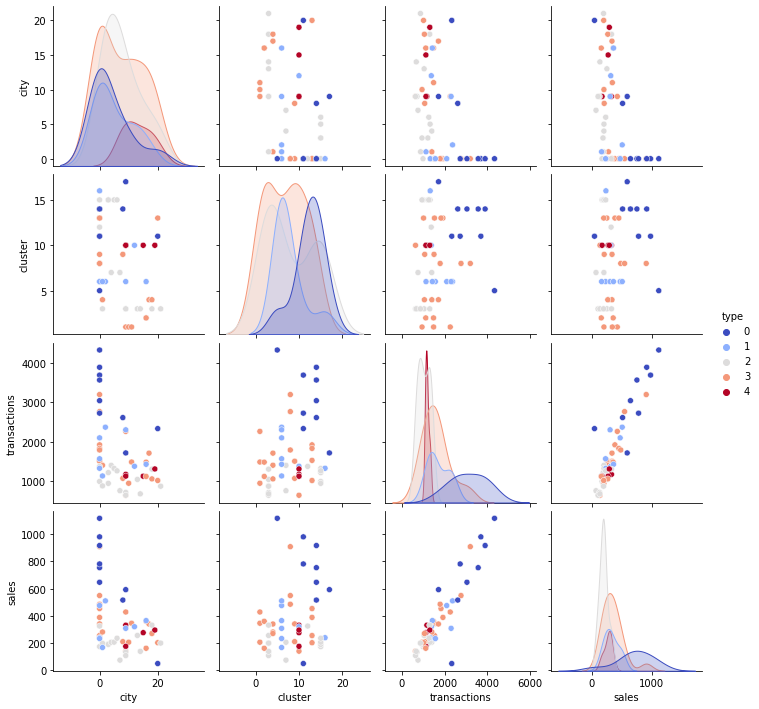

In [42]:
sns.pairplot(df_train_store[['city', 'type', 'cluster', 'transactions', 'sales']], hue='type', palette='coolwarm')

In [43]:
df_train_date = pd.DataFrame(df_train['date'].unique(), columns=['date'])

df_train_date.head(5)

,date
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [44]:
df_train_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1684 entries, 0 to 1683
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1684 non-null   object
dtypes: object(1)
memory usage: 13.3+ KB


In [45]:
df_train_date.loc[len(df_train_date.index) - 1]

date    2017-08-15
Name: 1683, dtype: object

In [ ]:
# df_train_date['oil_price'] = df_train_date['date'].apply(lambda date: df_oil[df_oil['date'] == date]['dcoilwtico'].values[0])

# df_train_date.head(5)

In [ ]:
# def is_celebrated(date):
#   if df_holiday[df_holiday['date'] == date]['celebrate'].size == 0:
#     return False
#   elif df_holiday[df_holiday['date'] == date]['celebrate'].values[0] == False:
#     return False
#   else:
#     return True

# df_train_date['celebrate'] = df_train_date['date'].apply(lambda date: is_celebrated(date))

# df_train_date.head(5)

In [ ]:
# df_train_date.info()

In [ ]:
# df_train_date['transactions'] = df_train_date['date'].apply(lambda date: df_transactions[df_transactions['date'] == date]['transactions'].mean())

# df_train_date.head(5)

In [ ]:
# df_train_date['sales'] = df_train_date['date'].apply(lambda date: df_train[df_train['date'] == date]['sales'].mean())

# df_train_date.head(5)

In [ ]:
# df_train_date['onpromotion'] = df_train_date['date'].apply(lambda date: df_train[df_train['date'] == date]['onpromotion'].mean())

# df_train_date.head(5)

In [46]:
# df_train_date.to_csv(os.path.join(file_path, 'train_date.csv'), index=False)

df_train_date = pd.read_csv(os.path.join(file_path, 'train_date.csv'))
df_train_date.head(5)

,date,oil_price,celebrate,transactions,sales,onpromotion
0,2013-01-01,94.756667,True,770.000000,1.409438,0.0
1,2013-01-02,93.140000,False,2026.413043,278.390807,0.0
2,2013-01-03,92.970000,False,1706.608696,202.840197,0.0
3,2013-01-04,93.120000,False,1706.391304,198.911154,0.0
4,2013-01-05,94.756667,False,2034.195652,267.873244,0.0


In [47]:
df_train_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1684 entries, 0 to 1683
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1684 non-null   object 
 1   oil_price     1684 non-null   float64
 2   celebrate     1684 non-null   bool   
 3   transactions  1682 non-null   float64
 4   sales         1684 non-null   float64
 5   onpromotion   1684 non-null   float64
dtypes: bool(1), float64(4), object(1)
memory usage: 67.6+ KB


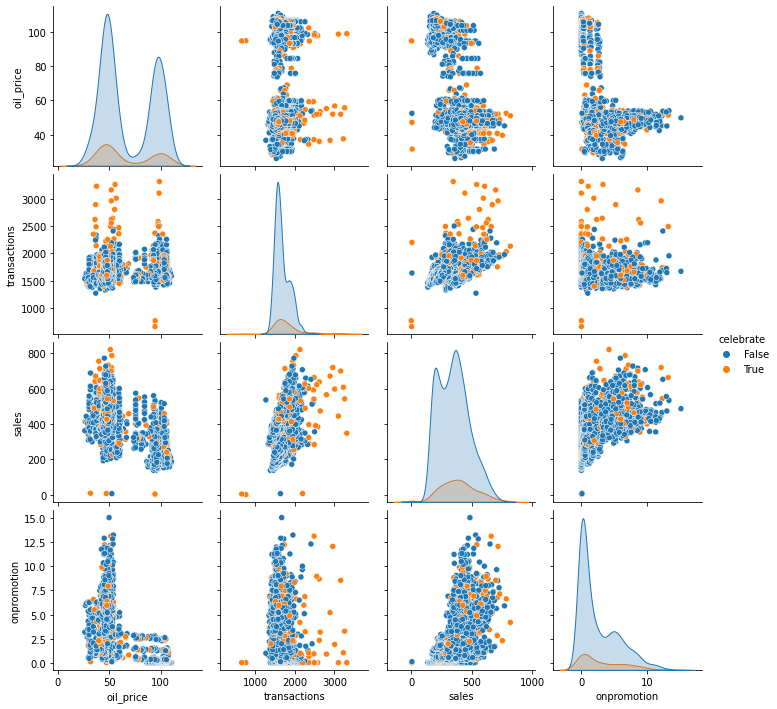

In [48]:
sns.pairplot(df_train_date, hue='celebrate', vars=['oil_price', 'transactions', 'sales', 'onpromotion'])

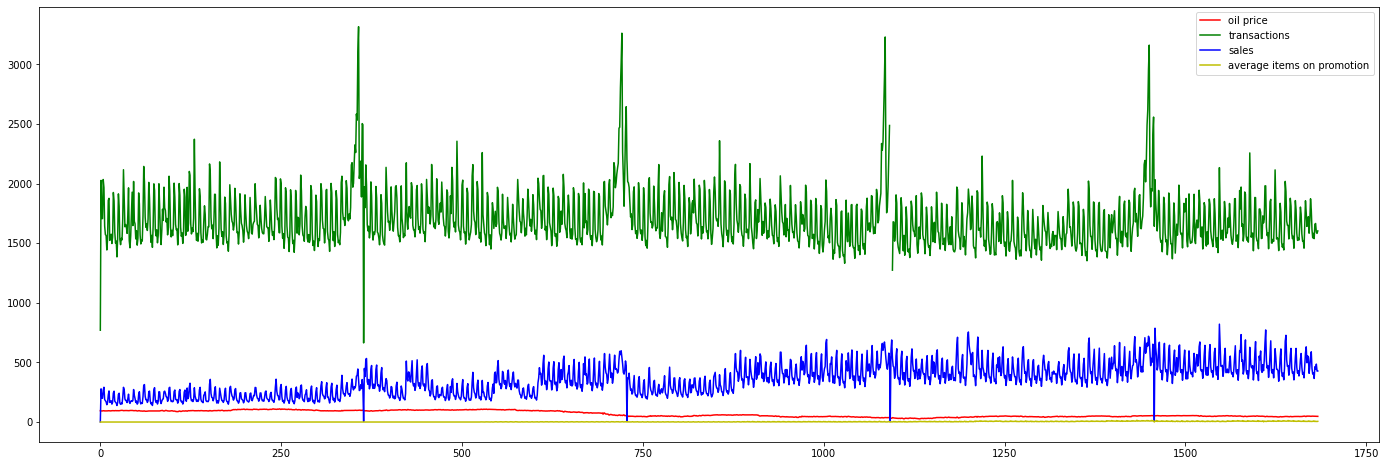

In [49]:
ax = plt.figure(figsize=(24, 8))
x = np.array(df_train_date.index)
plt.plot(x, np.array(df_train_date['oil_price'].values), color='r', label='oil price')
plt.plot(x, np.array(df_train_date['transactions'].values), color='g', label='transactions')
plt.plot(x, np.array(df_train_date['sales'].values), color='b', label='sales')
plt.plot(x, np.array(df_train_date['onpromotion'].values), color='y', label='average items on promotion')
plt.legend()